In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simulation

In [3]:
outcomes = make_array('heads', 'tails')
outcomes

array(['heads', 'tails'], dtype='<U5')

In [11]:
np.random.choice(outcomes)

'tails'

In [12]:
np.random.choice(outcomes, 10)

array(['tails', 'heads', 'tails', 'tails', 'heads', 'heads', 'heads',
       'heads', 'heads', 'heads'], dtype='<U5')

In [13]:
np.random.choice(outcomes, 10) == 'heads'

array([False, False, False,  True, False, False,  True, False,  True,
        True])

In [14]:
sum(np.random.choice(outcomes, 10) == 'heads')

6

In [15]:
sum(np.random.choice(outcomes, 10) == 'tails')

6

In [16]:
flips = np.random.choice(outcomes, 10)

In [21]:
sum(flips == 'heads')

5

In [22]:
sum(flips == 'tails')

5

In [23]:
def heads_in_100_tosses():
    return sum(np.random.choice(outcomes, 100) == 'heads')

In [29]:
results = make_array() # initializing an empty array, to collect stuff later

for i in np.arange(10000):
    results = np.append(results, heads_in_100_tosses())
    
results

array([54., 49., 51., ..., 47., 60., 50.])

In [26]:
heads = Table().with_columns('Heads', results)
heads

Heads
57
44
51
46
41
53
57
38
52
45


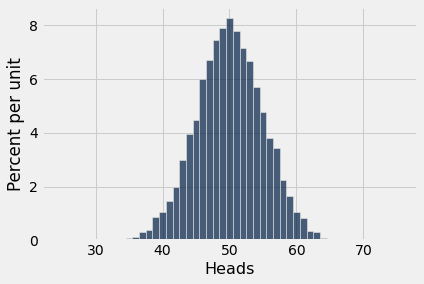

In [27]:
heads.hist('Heads', bins=np.arange(24.5, 76.5))

## Monty Hall

In [30]:
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [31]:
goats = make_array('first goat', 'second goat')

def other_goat(a_goat):
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'


In [32]:
other_goat('first goat')

'second goat'

In [33]:
other_goat('second goat')

'first goat'

In [34]:
other_goat('wheeler hall')

In [35]:
def monty_hall():
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_door = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_door]

In [36]:
monty_hall()
# the correct answer is to swap!

['first goat', 'second goat', 'car']

In [37]:
games = Table(['Guess', 'Revealed', 'Remaining'])

In [38]:
games.append(monty_hall())

Guess,Revealed,Remaining
second goat,first goat,car


In [39]:
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in range(3000):
    games.append(monty_hall())
    
games

Guess,Revealed,Remaining
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
second goat,first goat,car
car,first goat,second goat


In [40]:
games.group('Remaining')

Remaining,count
car,2019
first goat,468
second goat,513


In [41]:
games.group('Guess')

Guess,count
car,981
first goat,1027
second goat,992
